In [885]:
#!pip install geopandas shapely

In [886]:
# All the package imports
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import nearest_points
import pandas as pd
import numpy as np
from scipy import interpolate, stats
import plotly.graph_objects as go

In [887]:
# Read in the West Seattle Shapefile
west_sea = gpd.read_file('shapefiles/west_sea/west_sea_cleaned2.shp')

In [888]:
west_sea.dtypes

id               int64
fid            float64
cat              int64
cat_             int64
cat__1           int64
cat__1_1         int64
OBJECTID         int64
ARTCLASS       float64
COMPKEY          int64
UNITID          object
UNITID2         object
UNITIDSORT      object
UNITDESC        object
STNAME_ORD      object
XSTRLO          object
XSTRHI          object
ARTDESCRIP      object
OWNER           object
STATUS          object
BLOCKNBR       float64
SPEEDLIMIT     float64
SEGDIR          object
ONEWAY          object
ONEWAYDIR       object
FLOW            object
SEGLENGTH      float64
SURFACEWID     float64
SURFACETYP      object
SURFACET_1      object
INTRLO          object
DIRLO           object
INTKEYLO       float64
INTRHI          object
DIRHI           object
NATIONHWYS      object
STREETTYPE      object
PVMTCONDIN     float64
PVMTCOND_1     float64
TRANCLASS        int64
TRANDESCRI      object
SLOPE_PCT      float64
PVMTCATEGO      object
PARKBOULEV      object
SHAPE_Leng 

In [889]:
# Find the length of the Unique Key
len(west_sea['OBJECTID'].unique())

3203

In [890]:
west_sea.head()

,id,fid,cat,cat_,cat__1,cat__1_1,OBJECTID,ARTCLASS,COMPKEY,UNITID,...,PVMTCOND_1,TRANCLASS,TRANDESCRI,SLOPE_PCT,PVMTCATEGO,PARKBOULEV,SHAPE_Leng,source,target,geometry
0,650,650.0,650,650,660,660,4998,0.0,645918,04315,...,0.0,0,NOT DESIGNATED,16.0,NON-ART,N,124.431320,1025,270,"LINESTRING (-122.40534 47.57744, -122.40536 47..."
1,1237,1237.0,1237,1237,1252,1252,9560,0.0,23012,18335,...,0.0,0,NOT DESIGNATED,7.0,NON-ART,N,226.118990,1551,1468,"LINESTRING (-122.36718 47.56762, -122.36809 47..."
2,2051,2051.0,2051,2051,2079,2079,16145,0.0,2173,00570,...,0.0,0,NOT DESIGNATED,0.0,NON-ART,N,17.984077,383,1949,"LINESTRING (-122.35466 47.55940, -122.35459 47..."
3,581,581.0,581,581,588,588,4742,0.0,22406,17835,...,0.0,0,NOT DESIGNATED,1.0,NON-ART,N,174.386995,944,945,"LINESTRING (-122.35885 47.54289, -122.35956 47..."
4,1258,1258.0,1258,1258,1274,1274,9778,0.0,5789,02905,...,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,264.117936,1568,386,"LINESTRING (-122.37929 47.53490, -122.37929 47..."


In [891]:
west_sea = west_sea[west_sea['SPEEDLIMIT'] >= 0]

In [892]:
nodes1 = west_sea['source']
nodes2 = west_sea['target']
nodes_ws = list(set().union(nodes1, nodes2))

In [893]:
west_sea.head()

,id,fid,cat,cat_,cat__1,cat__1_1,OBJECTID,ARTCLASS,COMPKEY,UNITID,...,PVMTCOND_1,TRANCLASS,TRANDESCRI,SLOPE_PCT,PVMTCATEGO,PARKBOULEV,SHAPE_Leng,source,target,geometry
0,650,650.0,650,650,660,660,4998,0.0,645918,04315,...,0.0,0,NOT DESIGNATED,16.0,NON-ART,N,124.431320,1025,270,"LINESTRING (-122.40534 47.57744, -122.40536 47..."
1,1237,1237.0,1237,1237,1252,1252,9560,0.0,23012,18335,...,0.0,0,NOT DESIGNATED,7.0,NON-ART,N,226.118990,1551,1468,"LINESTRING (-122.36718 47.56762, -122.36809 47..."
2,2051,2051.0,2051,2051,2079,2079,16145,0.0,2173,00570,...,0.0,0,NOT DESIGNATED,0.0,NON-ART,N,17.984077,383,1949,"LINESTRING (-122.35466 47.55940, -122.35459 47..."
3,581,581.0,581,581,588,588,4742,0.0,22406,17835,...,0.0,0,NOT DESIGNATED,1.0,NON-ART,N,174.386995,944,945,"LINESTRING (-122.35885 47.54289, -122.35956 47..."
4,1258,1258.0,1258,1258,1274,1274,9778,0.0,5789,02905,...,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,264.117936,1568,386,"LINESTRING (-122.37929 47.53490, -122.37929 47..."


In [894]:
# Read in the shapefile containing Start and End points generated using 'Extract Specific Points' in QGIS for 0,-1 vertex indices
west_sea_start_end = gpd.read_file('shapefiles/west_sea/west_sea_cleaned2_nodes.shp')
west_sea_start_end.head()

,id,cnt,chk,ein,eout,geometry
0,1.0,4,0,None,None,POINT (-122.35178 47.52832)
1,2.0,4,0,None,None,POINT (-122.35184 47.52651)
2,3.0,4,0,None,None,POINT (-122.35169 47.52284)
3,4.0,4,0,None,None,POINT (-122.35170 47.52101)
4,5.0,3,0,None,None,POINT (-122.35278 47.53012)


In [895]:
west_sea_start_end = west_sea_start_end.loc[west_sea_start_end['id'].isin(nodes_ws)]

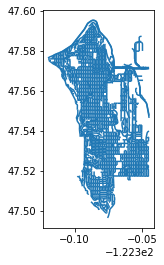

In [896]:
# Plot the west seattle roads
west_sea.plot()

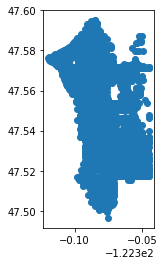

In [897]:
# Plot the points
west_sea_start_end.plot()

In [898]:
west_sea_start_end.geometry.x

0      -122.351777
1      -122.351844
2      -122.351687
3      -122.351703
4      -122.352780
           ...    
2236   -122.344925
2237   -122.356206
2238   -122.360111
2239   -122.360685
2240   -122.358723
Length: 2240, dtype: float64

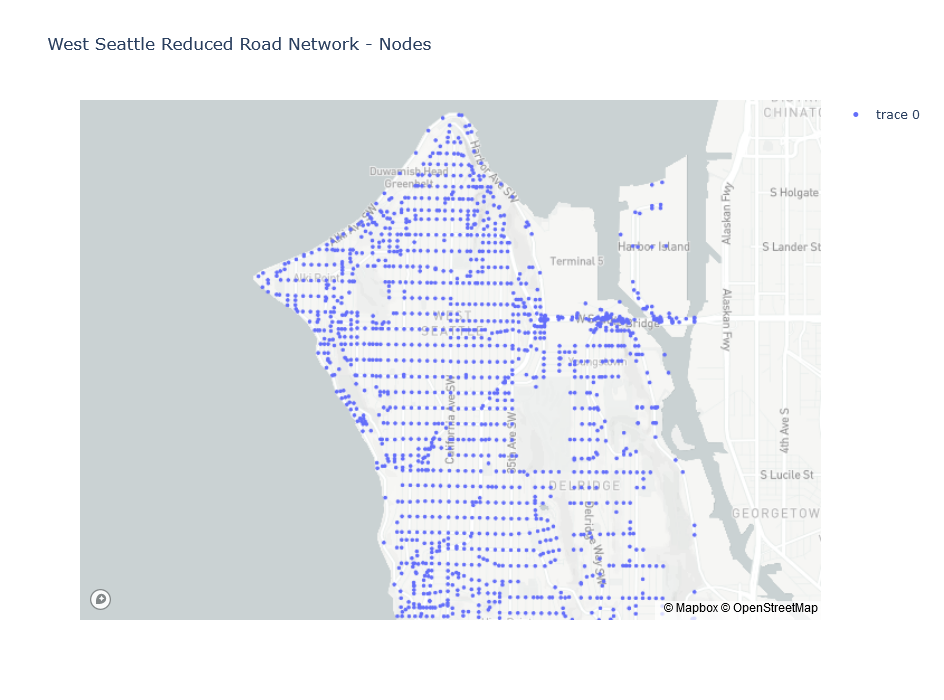

In [899]:
token = 'pk.eyJ1IjoiY2hpbnRhbnAiLCJhIjoiY2ppYXU1anVuMThqazNwcDB2cGtneDdkYyJ9.TL6RTyRRFCbvJWyFa4P0Ow'
fig = go.Figure(data=go.Scattermapbox(
        lon = west_sea_start_end.geometry.x,
        lat = west_sea_start_end.geometry.y,
        text = west_sea_start_end.id,
        mode = 'markers',
            marker=go.scattermapbox.Marker(
                size=5
            )
        ))
fig.update_layout(
        title_text = 'West Seattle Reduced Road Network - Nodes',
        showlegend = True,
        mapbox_style="light", mapbox_accesstoken=token,
        mapbox_zoom=12, mapbox_center = {"lat":  47.5667, "lon": -122.3868}, 
        width=1000, 
        height=700
    )
fig.show()

In [900]:
# Check the CRS
west_sea.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [901]:
west_sea_df = west_sea[['OBJECTID', 'geometry', 'SHAPE_Leng', 'SPEEDLIMIT', 'source', 'target']]
west_sea_df.head()

,OBJECTID,geometry,SHAPE_Leng,SPEEDLIMIT,source,target
0,4998,"LINESTRING (-122.40534 47.57744, -122.40536 47...",124.431320,20.0,1025,270
1,9560,"LINESTRING (-122.36718 47.56762, -122.36809 47...",226.118990,20.0,1551,1468
2,16145,"LINESTRING (-122.35466 47.55940, -122.35459 47...",17.984077,20.0,383,1949
3,4742,"LINESTRING (-122.35885 47.54289, -122.35956 47...",174.386995,20.0,944,945
4,9778,"LINESTRING (-122.37929 47.53490, -122.37929 47...",264.117936,20.0,1568,386


___________________
_________________

## Get the population data from census

In [902]:
pop_sea = pd.read_csv("population_data/Census_Tract_-_2010_Population_Statistics.csv")
pop_sea.head()

,OBJECTID,GEOID10,TRACT,NAME10,ACRES_TOTAL,ACRES_LAND,ACRES_WATER,GEO_TYPE,Total_Population,Population_Not_Hispanic_or_Latino,...,Female_Person_of_Color,Male_Person_of_Color_under_5_years,Female_Person_of_Color_under_5_years,Male_Person_of_Color_5_17_years,Female_Person_of_Color_5_17_years,Male_Person_of_Color_65_and_over,Female_Person_of_Color_65_and_over,Total_Person_of_Color,DIVERSITY_INDEX,POP_UNDER_18
0,1,53033002500,2500,25.0,243.219083,NaN,NaN,Tract,2802,2682,...,291,31,26,40,49,16,20,551,34,521
1,2,53033002600,2600,26.0,307.584420,NaN,NaN,Tract,4660,4449,...,452,40,39,70,68,15,19,862,33,892
2,3,53033005600,5600,56.0,737.511728,NaN,NaN,Tract,6382,6216,...,386,37,31,82,72,21,40,732,21,1446
3,4,53033006800,6800,68.0,177.438771,NaN,NaN,Tract,2834,2697,...,219,17,19,36,31,10,12,408,26,566
4,5,53033006000,6000,60.0,324.567432,NaN,NaN,Tract,5150,4959,...,472,33,30,46,47,24,35,851,30,645


In [903]:
pop_sea.dtypes

OBJECTID                                int64
GEOID10                                 int64
TRACT                                   int64
NAME10                                float64
ACRES_TOTAL                           float64
                                       ...   
Male_Person_of_Color_65_and_over        int64
Female_Person_of_Color_65_and_over      int64
Total_Person_of_Color                   int64
DIVERSITY_INDEX                         int64
POP_UNDER_18                            int64
Length: 176, dtype: object

In [904]:
len(pop_sea)

135

In [905]:
pop_sea.describe()

,OBJECTID,GEOID10,TRACT,NAME10,ACRES_TOTAL,ACRES_LAND,ACRES_WATER,Total_Population,Population_Not_Hispanic_or_Latino,Population_Hispanic_or_Latino,...,Female_Person_of_Color,Male_Person_of_Color_under_5_years,Female_Person_of_Color_under_5_years,Male_Person_of_Color_5_17_years,Female_Person_of_Color_5_17_years,Male_Person_of_Color_65_and_over,Female_Person_of_Color_65_and_over,Total_Person_of_Color,DIVERSITY_INDEX,POP_UNDER_18
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,0.0,0.0,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,5.303301e+10,6761.059259,67.610593,394.495082,NaN,NaN,4508.592593,4209.859259,298.733333,...,767.681481,54.333333,51.577778,110.792593,109.481481,56.874074,78.859259,1519.125926,46.903704,692.688889
std,39.115214,4.593243e+03,4593.242733,45.932427,304.001037,NaN,NaN,1587.091535,1508.180901,204.578825,...,566.620653,46.663610,44.704747,115.817284,109.327036,67.202793,92.860766,1114.336008,16.893819,410.374082
min,1.000000,5.303300e+10,100.000000,1.000000,14.999770,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,34.500000,5.303300e+10,3350.000000,33.500000,226.053323,NaN,NaN,3500.500000,3224.000000,177.500000,...,381.500000,24.000000,21.000000,38.500000,41.000000,15.000000,22.000000,731.500000,31.000000,437.000000
50%,68.000000,5.303301e+10,6600.000000,66.000000,307.584420,NaN,NaN,4476.000000,4220.000000,252.000000,...,570.000000,37.000000,36.000000,70.000000,70.000000,26.000000,38.000000,1148.000000,44.000000,655.000000
75%,101.500000,5.303301e+10,9701.500000,97.015000,483.951148,NaN,NaN,5612.500000,5162.000000,353.000000,...,1045.500000,70.000000,67.500000,119.000000,128.500000,71.000000,89.000000,2049.000000,61.500000,920.500000
max,135.000000,5.303303e+10,26500.000000,265.000000,2341.806557,NaN,NaN,7789.000000,7571.000000,1456.000000,...,3007.000000,244.000000,248.000000,565.000000,534.000000,266.000000,395.000000,5868.000000,75.000000,2069.000000


In [906]:
#! pip install censusgeocode

_____________
______________

## Get the TIGER dataset to Find Census Tract Centroids

In [907]:
tiger2010_king = gpd.read_file('shapefiles/tiger2010_kingcounty/tl_2010_53033_tract10.shp')

In [908]:
tiger2010_king.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,033,022006,53033022006,220.06,Census Tract 220.06,G5020,S,1408907,0,+47.7043393,-122.1992667,"POLYGON ((-122.21048 47.70592, -122.21053 47.7..."
1,53,033,032320,53033032320,323.20,Census Tract 323.20,G5020,S,9554873,38494,+47.7564769,-122.1244452,"POLYGON ((-122.13182 47.77569, -122.13199 47.7..."
2,53,033,031703,53033031703,317.03,Census Tract 317.03,G5020,S,7139218,643846,+47.3716888,-122.1484314,"POLYGON ((-122.16541 47.37570, -122.16541 47.3..."
3,53,033,031206,53033031206,312.06,Census Tract 312.06,G5020,S,3668962,60430,+47.3135621,-122.1835380,"POLYGON ((-122.17046 47.31165, -122.17138 47.3..."
4,53,033,032102,53033032102,321.02,Census Tract 321.02,G5020,S,79040166,84391,+47.4851508,-121.9657840,"POLYGON ((-122.03367 47.47680, -122.03441 47.4..."


In [909]:
tiger2010_king['GEOID10'] = tiger2010_king['GEOID10'].astype('int64')
tiger2010_king['INTPTLAT10'] = tiger2010_king['INTPTLAT10'].astype('float64')
tiger2010_king['INTPTLON10'] = tiger2010_king['INTPTLON10'].astype('float64')

In [910]:
tiger2010_king.dtypes

STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
GEOID10          int64
NAME10          object
NAMELSAD10      object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10     float64
INTPTLON10     float64
geometry      geometry
dtype: object

In [911]:
pop_sea_ll = pd.merge(left=pop_sea, right=tiger2010_king[['GEOID10', 'INTPTLAT10', 'INTPTLON10']], how="inner", on='GEOID10', validate="one_to_one")

In [912]:
pop_sea_ll.head()

,OBJECTID,GEOID10,TRACT,NAME10,ACRES_TOTAL,ACRES_LAND,ACRES_WATER,GEO_TYPE,Total_Population,Population_Not_Hispanic_or_Latino,...,Female_Person_of_Color_under_5_years,Male_Person_of_Color_5_17_years,Female_Person_of_Color_5_17_years,Male_Person_of_Color_65_and_over,Female_Person_of_Color_65_and_over,Total_Person_of_Color,DIVERSITY_INDEX,POP_UNDER_18,INTPTLAT10,INTPTLON10
0,1,53033002500,2500,25.0,243.219083,NaN,NaN,Tract,2802,2682,...,26,40,49,16,20,551,34,521,47.683897,-122.302279
1,2,53033002600,2600,26.0,307.584420,NaN,NaN,Tract,4660,4449,...,39,70,68,15,19,862,33,892,47.682203,-122.311399
2,3,53033005600,5600,56.0,737.511728,NaN,NaN,Tract,6382,6216,...,31,82,72,21,40,732,21,1446,47.640547,-122.407105
3,4,53033006800,6800,68.0,177.438771,NaN,NaN,Tract,2834,2697,...,19,36,31,10,12,408,26,566,47.636031,-122.356465
4,5,53033006000,6000,60.0,324.567432,NaN,NaN,Tract,5150,4959,...,30,46,47,24,35,851,30,645,47.643616,-122.352052


In [913]:
len(pop_sea)

135

In [914]:
len(tiger2010_king)

398

In [915]:
len(pop_sea_ll)

135

In [916]:
# pop_sea_gdf = gpd.GeoDataFrame(pop_sea_ll, gpd.points_from_xy(pop_sea_ll.INTPTLAT10, pop_sea_ll.INTPTLON10))
# pop_sea_gdf.head()
pop_sea_points = [Point(xy) for xy in zip(pop_sea_ll.INTPTLON10, pop_sea_ll.INTPTLAT10)]
pop_sea_points[1:3]

In [917]:
pop_sea_gdf = gpd.GeoDataFrame(pop_sea_ll[['GEOID10', 'NAME10', 'Total_Population']], crs=west_sea.crs, geometry=pop_sea_points)
pop_sea_gdf.head()
# pop_sea_gdf.crs

,GEOID10,NAME10,Total_Population,geometry
0,53033002500,25.0,2802,POINT (-122.30228 47.68390)
1,53033002600,26.0,4660,POINT (-122.31140 47.68220)
2,53033005600,56.0,6382,POINT (-122.40711 47.64055)
3,53033006800,68.0,2834,POINT (-122.35647 47.63603)
4,53033006000,60.0,5150,POINT (-122.35205 47.64362)


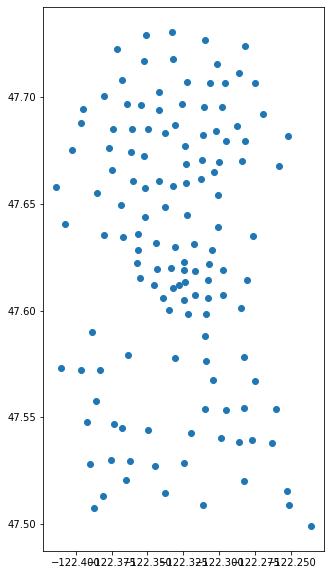

In [918]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#ax.set_box_aspect(1)
pop_sea_gdf.plot(ax=ax)

In [919]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# ax.set_fig_aspect(1)
# west_sea.plot(ax=ax)
# pop_sea_gdf.plot(ax=ax)

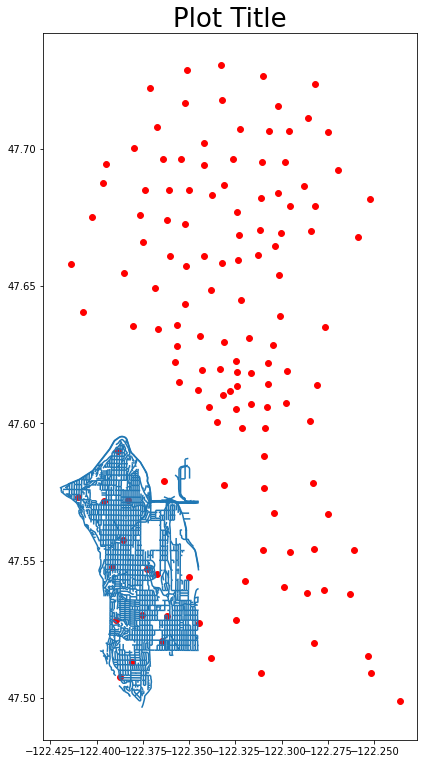

In [920]:
fontsize=26
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)
plt.title("Plot Title", fontsize=fontsize)
# df = merge_to_polygons_for_year(dataframe, year)
west_sea.plot(ax=ax, legend=True)
if True:
    for index, row in pop_sea_ll.iterrows():
        plt.scatter(x=row['INTPTLON10'], y=row['INTPTLAT10'], color='red', s=35)
# fig.get_axes()[0].set_axis_off()
plt.show()

________________
______________

## Clip Population Data to West Seattle

In [921]:
#!pip install descartes

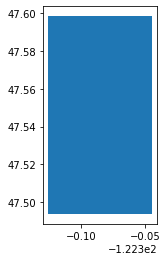

In [922]:
west_sea_bbox = gpd.read_file("shapefiles/west_sea/bbox.shp")
west_sea_bbox.plot()

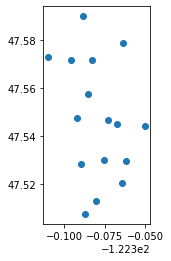

In [923]:
# Clip the Pop_sea gdf with this mask 
west_sea_pop = gpd.clip(pop_sea_gdf, west_sea_bbox)
west_sea_pop.plot()

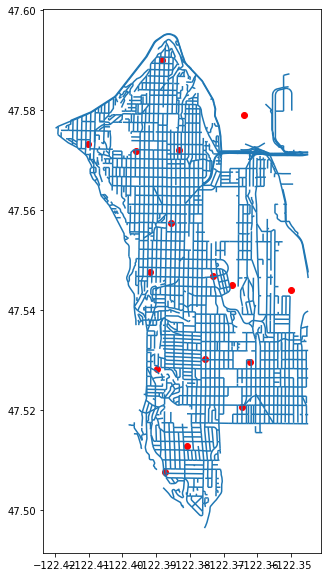

In [924]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# ax.set_fig_aspect(1)
west_sea.plot(ax=ax)
west_sea_pop.plot(ax=ax, color='red')

________________
______________

## Find Nearest Points to Census Tracts from Roads Shapefile

In [925]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    print(nearest)
    value = df2[nearest][src_column]
    return value

In [926]:
# Create a MultiPoint object
west_sea_start_union = west_sea_start_end.unary_union
#print(west_sea_start_union)

In [927]:
#west_sea_start.head()

In [928]:
#west_sea_pop['nearest_id'] = west_sea_pop.apply(nearest, geom_union=west_sea_start_union, df1=west_sea_pop, df2=west_sea_start, src_column='OBJECTID', axis=1)

In [929]:
print(pd.__version__)

1.0.5


In [930]:
west_sea_pop.head()


,GEOID10,NAME10,Total_Population,geometry
106,53033012100,121.00,2681,POINT (-122.38738 47.50760)
107,53033012000,120.00,3349,POINT (-122.38068 47.51293)
108,53033011402,114.02,4174,POINT (-122.36463 47.52067)
109,53033011600,116.00,6413,POINT (-122.38978 47.52827)
111,53033011500,115.00,4191,POINT (-122.37553 47.53018)


In [931]:
west_sea_pop['node_id'] = ''

In [932]:
for index, row in west_sea_pop.iterrows():
    # print(row['geometry'])
    nearest_pt = nearest_points(row['geometry'], west_sea_start_union)
    # print(nearest_pt[1])
    matches = west_sea_start_end[west_sea_start_end['geometry'] == nearest_pt[1]]
    resrow = matches.iloc[0]
    west_sea_pop.at[index, 'node_id'] = resrow['id']

In [933]:
west_sea_pop['Total_Population'].sum()

76847

In [934]:
west_sea_pop

,GEOID10,NAME10,Total_Population,geometry,node_id
106,53033012100,121.00,2681,POINT (-122.38738 47.50760),1932
107,53033012000,120.00,3349,POINT (-122.38068 47.51293),1812
108,53033011402,114.02,4174,POINT (-122.36463 47.52067),1062
109,53033011600,116.00,6413,POINT (-122.38978 47.52827),2128
111,53033011500,115.00,4191,POINT (-122.37553 47.53018),1082
112,53033011401,114.01,4027,POINT (-122.36203 47.52971),1790
113,53033010800,108.00,4596,POINT (-122.34987 47.54403),527
114,53033010701,107.01,3385,POINT (-122.36750 47.54507),210
115,53033010600,106.00,7310,POINT (-122.39187 47.54765),712
116,53033010702,107.02,3679,POINT (-122.37303 47.54680),347


______________
_____________

## Merge Population data with Nodes DataFrame

In [935]:
west_sea_pop_df = west_sea_start_end[['id', 'geometry']]
# west_sea_pop_df['Total_Population'] = 0

In [936]:
west_sea_pop_df.head()

,id,geometry
0,1.0,POINT (-122.35178 47.52832)
1,2.0,POINT (-122.35184 47.52651)
2,3.0,POINT (-122.35169 47.52284)
3,4.0,POINT (-122.35170 47.52101)
4,5.0,POINT (-122.35278 47.53012)


In [937]:
west_sea_pop_df = pd.merge(left=west_sea_pop_df, right=west_sea_pop[['Total_Population', 'node_id']], left_on='id', right_on='node_id', how='left')

In [938]:
west_sea_pop_df.head()

,id,geometry,Total_Population,node_id
0,1,POINT (-122.35178 47.52832),NaN,NaN
1,2,POINT (-122.35184 47.52651),NaN,NaN
2,3,POINT (-122.35169 47.52284),NaN,NaN
3,4,POINT (-122.35170 47.52101),NaN,NaN
4,5,POINT (-122.35278 47.53012),NaN,NaN


In [939]:
west_sea_pop_df['Total_Population'].describe()

count      16.000000
mean     4802.937500
std      1292.901928
min      2681.000000
25%      3940.000000
50%      4691.500000
75%      5517.000000
max      7310.000000
Name: Total_Population, dtype: float64

In [940]:
west_sea_pop_df['Total_Population'].sum()

76847.0

In [941]:
west_sea_pop_df['Total_Population'] = west_sea_pop_df['Total_Population'].fillna(0)

In [942]:
west_sea_pop_df.drop(columns=['node_id'], inplace=True)

In [943]:
west_sea_pop_df.head()

,id,geometry,Total_Population
0,1,POINT (-122.35178 47.52832),0.0
1,2,POINT (-122.35184 47.52651),0.0
2,3,POINT (-122.35169 47.52284),0.0
3,4,POINT (-122.35170 47.52101),0.0
4,5,POINT (-122.35278 47.53012),0.0


In [944]:
west_sea_df['SPEEDLIMIT'] = west_sea_df['SPEEDLIMIT'].fillna(0)

/root/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [945]:
west_sea_df[west_sea_df['SPEEDLIMIT'] == 0]

,OBJECTID,geometry,SHAPE_Leng,SPEEDLIMIT,source,target
623,4781,"LINESTRING (-122.34924 47.57165, -122.35019 47...",386.016418,0.0,991,992
1414,10920,"LINESTRING (-122.35081 47.57168, -122.35113 47...",286.402489,0.0,992,515
1515,11787,"LINESTRING (-122.35372 47.55369, -122.35368 47...",286.056436,0.0,1721,1722
2915,22320,"LINESTRING (-122.40347 47.57726, -122.40405 47...",863.349966,0.0,2138,1822


In [946]:
west_sea_df['SPEEDLIMIT'] = west_sea_df['SPEEDLIMIT'].replace(to_replace=0.0, value=20)

/root/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [947]:
west_sea_df['SPEEDLIMIT'].describe()

count    3314.000000
mean       21.478576
std         3.224893
min        20.000000
25%        20.000000
50%        20.000000
75%        20.000000
max        45.000000
Name: SPEEDLIMIT, dtype: float64

In [948]:
west_sea_df['cost_sec'] = west_sea_df['SHAPE_Leng'] / (west_sea_df['SPEEDLIMIT'] * 1.46667)

In [949]:
west_sea_df['cost_sec'].describe()

count    3314.000000
mean       15.031091
std        12.793809
min         0.531542
25%         8.649806
50%        11.340302
75%        21.632412
max       317.133463
Name: cost_sec, dtype: float64

In [950]:
west_sea_df[west_sea_df['cost_sec'] < 1.0]

,OBJECTID,geometry,SHAPE_Leng,SPEEDLIMIT,source,target,cost_sec
2,16145,"LINESTRING (-122.35466 47.55940, -122.35459 47...",17.984077,20.0,383,1949,0.613092
75,469,"LINESTRING (-122.39306 47.54057, -122.39307 47...",23.791044,20.0,137,138,0.811056
2027,15975,"LINESTRING (-122.35389 47.56125, -122.35392 47...",25.607846,20.0,1941,1637,0.872993
2129,16688,"LINESTRING (-122.39273 47.52857, -122.39273 47...",19.489912,25.0,1861,1250,0.531542
2488,19533,"LINESTRING (-122.37999 47.52073, -122.38008 47...",20.588441,20.0,84,2061,0.701877


In [951]:
west_sea_df['cost_min'] = west_sea_df['cost_sec'] / 60

/root/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [952]:
west_sea_df['cost_min'] = west_sea_df['cost_min'].apply(np.ceil)

In [953]:
#west_sea_df['cost_sec'] = west_sea_df['cost_sec'].apply(np.ceil)

In [954]:
west_sea_df['cost_sec'].describe()

count    3314.000000
mean       15.031091
std        12.793809
min         0.531542
25%         8.649806
50%        11.340302
75%        21.632412
max       317.133463
Name: cost_sec, dtype: float64

_______________
_______________

## Capacity Calculation

In [955]:
speeds = np.array([45, 55, 60, 65, 70, 75])
capacities = np.array([1900, 2250, 2300, 2350, 2400, 2400])

In [956]:
f_capacity = interpolate.interp1d(speeds, capacities, fill_value='extrapolate')

In [957]:
west_sea_df['capacity'] = f_capacity(west_sea_df['SPEEDLIMIT'])

In [958]:
f_capacity(20)

array(1025.)

In [959]:
west_sea_df['capacity'].describe()

count    3314.000000
mean     1076.750151
std       112.871246
min      1025.000000
25%      1025.000000
50%      1025.000000
75%      1025.000000
max      1900.000000
Name: capacity, dtype: float64

In [960]:
west_sea_df.head()

,OBJECTID,geometry,SHAPE_Leng,SPEEDLIMIT,source,target,cost_sec,cost_min,capacity
0,4998,"LINESTRING (-122.40534 47.57744, -122.40536 47...",124.431320,20.0,1025,270,4.241967,1.0,1025.0
1,9560,"LINESTRING (-122.36718 47.56762, -122.36809 47...",226.118990,20.0,1551,1468,7.708584,1.0,1025.0
2,16145,"LINESTRING (-122.35466 47.55940, -122.35459 47...",17.984077,20.0,383,1949,0.613092,1.0,1025.0
3,4742,"LINESTRING (-122.35885 47.54289, -122.35956 47...",174.386995,20.0,944,945,5.944998,1.0,1025.0
4,9778,"LINESTRING (-122.37929 47.53490, -122.37929 47...",264.117936,20.0,1568,386,9.004000,1.0,1025.0


In [961]:
start_nodes = west_sea_df['source'].tolist()
start_nodes[0:3]

[1025, 1551, 383]

In [962]:
end_nodes = west_sea_df['target'].tolist()
end_nodes[0:3]

[270, 1468, 1949]

In [963]:
capacities = west_sea_df['capacity'].astype('int64').tolist()
capacities[0:3]

[1025, 1025, 1025]

In [964]:
unit_cost = west_sea_df['cost_sec'].astype('int64').tolist()
unit_cost[0:3]

[4, 7, 0]

In [965]:
supplies = west_sea_pop_df['Total_Population'].astype('int64').tolist()
supplies[0:3]

[0, 0, 0]

In [966]:
stats.describe(supplies)

DescribeResult(nobs=2240, minmax=(0, 7310), mean=34.30669642857143, variance=174867.75448841156, skewness=12.843302523348417, kurtosis=171.5787762046539)

In [967]:
#!pip install ortools

In [968]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  2 19:37:47 2020

@author: icnis
"""
# for the maximum flow problem

from ortools.graph import pywrapgraph
import numpy as np

# instantinae a SimpleMinCostFlow Solver
max_flow = pywrapgraph.SimpleMaxFlow()

# instantinae a SimpleMinCostFlow Solver
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# print('UnitCost:', unit_cost)

# add each link
for i in range(0, len(start_nodes)):
    max_flow.AddArcWithCapacity(start_nodes[i], end_nodes[i], capacities[i])
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i], capacities[i], unit_cost[i])
    # print('%3s -> %3s' % (start_nodes[i], end_nodes[i]))

# solve
# Note: revise this to be consistent with the node definition
if max_flow.Solve(2178, 2238) == max_flow.OPTIMAL:
    print('Max Flow:', max_flow.OptimalFlow())
    print(' ')
    print('  Arc    Flow / Capacity')
    # for i in range(max_flow.NumArcs()):
      # print('%1s -> %1s   %3s  / %3s' % (
      #      max_flow.Tail(i),
      #      max_flow.Head(i),
      #      max_flow.Flow(i),
      #      max_flow.Capacity(i)))
    print('Source side min-cut:', max_flow.GetSourceSideMinCut())
    # (b): minimum cut problem
    print('Sink side min-cut:', max_flow.GetSinkSideMinCut())
else:
    print('There was an issue with the max flow input.')


# add supplies:
#supplies = [100 , 100, 100, 100, 100, 100, 100, -700]
# supplies = [2, 2, 2, 2, 2, 2, 2, -14]

# for i in range(0, len(supplies)):
#    min_cost_flow.SetNodeSupply(i, supplies[i])

# solve
#if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
#    print('Minimum cost:', min_cost_flow.OptimalCost())
#    print(' ')
#    print('  Arc    Flow / Capacity  Cost')
#    for i in range(min_cost_flow.NumArcs()):
#      cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
#      print('%1s -> %1s   %3s  / %3s       %3s' % (
#            min_cost_flow.Tail(i),
#            min_cost_flow.Head(i),
#            min_cost_flow.Flow(i),
#            min_cost_flow.Capacity(i),
#            cost))
#else:
#    print('There was an issue with the min cost flow input.')

Max Flow: 0
 
  Arc    Flow / Capacity
Source side min-cut: [2178, 503, 504, 2043, 2179, 911, 2064, 1552, 1009, 2089, 2091, 2052, 1863, 383, 1864, 1949]
Sink side min-cut: [2238, 2233, 2237, 2200, 2230, 2187, 2219, 2180, 2192, 2186, 2120, 1456, 2236, 457, 2189, 513, 2188, 2104, 1455, 1977, 2213, 456, 1717, 2176, 2132, 2214, 2235, 2223, 1018, 1557, 2212, 1017, 1632, 2193, 2215, 514, 2199, 1556, 2205, 2097, 1603, 2183, 2232, 1016, 2177, 2140, 1910, 2240, 1240, 2225, 1015, 2222, 2226, 2239, 219, 1241, 2231, 2204, 2197, 2190, 2234, 2227, 2203, 2241, 2208, 2207, 2217, 2185, 2184, 2198, 220, 502, 1444, 1498, 501]


In [969]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  2 19:37:47 2020

@author: icnis
"""
# for the maximum flow problem

from ortools.graph import pywrapgraph
import numpy as np

# instantinae a SimpleMinCostFlow Solver
max_flow = pywrapgraph.SimpleMaxFlow()

# instantinae a SimpleMinCostFlow Solver
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# define start_nodes, end_nodes, capacities, and unit_cost

# (a): maximum flow problem
start_nodes = [0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
end_nodes =   [1, 3, 2, 6, 4, 6, 2, 5, 6, 7]

# cap. in veh/hr
capacities = [1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1900, 1900]
# cap in veh/min
# capacities = [25, 25, 25, 25, 25, 25, 25, 25, 32, 32]

# (c) minimum cost problem

# cost in hr
#unit_cost = [0.05, 0.04, 0.051, 0.056, 0.016, 0.05, 0.02, 0.048, 0.014, 0.033]

# cost in min
unit_cost = [30, 2, 3000, 4, 1, 3, 1, 3, 1, 2]

print('UnitCost:', unit_cost)

# add each link
for i in range(0, len(start_nodes)):
    max_flow.AddArcWithCapacity(start_nodes[i], end_nodes[i], capacities[i])
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i], capacities[i], unit_cost[i])
    print('%3s -> %3s' % (start_nodes[i], end_nodes[i]))

# solve
# Note: revise this to be consistent with the node definition
if max_flow.Solve(0, 7) == max_flow.OPTIMAL:
    print('Max Flow:', max_flow.OptimalFlow())
    print(' ')
    print('  Arc    Flow / Capacity')
    for i in range(max_flow.NumArcs()):
      print('%1s -> %1s   %3s  / %3s' % (
            max_flow.Tail(i),
            max_flow.Head(i),
            max_flow.Flow(i),
            max_flow.Capacity(i)))
    print('Source side min-cut:', max_flow.GetSourceSideMinCut())
    # (b): minimum cut problem
    print('Sink side min-cut:', max_flow.GetSinkSideMinCut())
else:
    print('There was an issue with the max flow input.')


# add supplies:
#supplies = [100 , 100, 100, 100, 100, 100, 100, -700]
supplies = [2, 2, 2, 2, 2, 2, 2, -14]

for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])

# solve
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Minimum cost:', min_cost_flow.OptimalCost())
    print(' ')
    print('  Arc    Flow / Capacity  Cost')
    for i in range(min_cost_flow.NumArcs()):
      cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
      print('%1s -> %1s   %3s  / %3s       %3s' % (
            min_cost_flow.Tail(i),
            min_cost_flow.Head(i),
            min_cost_flow.Flow(i),
            min_cost_flow.Capacity(i),
            cost))
else:
    print('There was an issue with the min cost flow input.')


UnitCost: [30, 2, 3000, 4, 1, 3, 1, 3, 1, 2]
  0 ->   1
  0 ->   3
  1 ->   2
  1 ->   6
  2 ->   4
  2 ->   6
  3 ->   2
  4 ->   5
  5 ->   6
  6 ->   7
Max Flow: 1900
 
  Arc    Flow / Capacity
0 -> 1   400  / 1500
0 -> 3   1500  / 1500
1 -> 2     0  / 1500
1 -> 6   400  / 1500
2 -> 4     0  / 1500
2 -> 6   1500  / 1500
3 -> 2   1500  / 1500
4 -> 5     0  / 1500
5 -> 6     0  / 1900
6 -> 7   1900  / 1900
Source side min-cut: [0, 1, 2, 6, 3, 4, 5]
Sink side min-cut: [7]
Minimum cost: 72
 
  Arc    Flow / Capacity  Cost
0 -> 1     0  / 1500         0
0 -> 3     2  / 1500         4
1 -> 2     0  / 1500         0
1 -> 6     2  / 1500         8
2 -> 4     0  / 1500         0
2 -> 6     6  / 1500        18
3 -> 2     4  / 1500         4
4 -> 5     2  / 1500         6
5 -> 6     4  / 1900         4
6 -> 7    14  / 1900        28
